In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"hamidrezahabibi","key":"1d5273ec655e4b20f87de8185e5e5f77"}'}

In [ ]:
# https://www.kaggle.com/general/74235

In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! cp kaggle.json ~/.kaggle/


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                             title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide            Covid Cases and Deaths WorldWide                     8KB  2023-02-01 12:22:51           2178         56  1.0              
ahsan81/hotel-reservations-classification-dataset               Hotel Reservations Dataset                         480KB  2023-01-04 12:50:31          11524        371  1.0              
datascientistanna/customers-dataset                             Shop Customer Data                                  23KB  2023-02-07 18:42:21           1789         51  1.0              
themrityunjaypathak/most-subscribed-1000-youtube-channels       M

In [ ]:
!kaggle datasets download -d kenjee/z-by-hp-unlocked-challenge-3-signal-processing

z-by-hp-unlocked-challenge-3-signal-processing.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -n z-by-hp-unlocked-challenge-3-signal-processing.zip

Archive:  z-by-hp-unlocked-challenge-3-signal-processing.zip


In [ ]:
!pip install tensorflow-io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
Capuchinbird_files=os.path.join('/content/Parsed_Capuchinbird_Clips','XC114131-0.wav')
NOT_Capuchinbird_files=os.path.join('/content/Parsed_Not_Capuchinbird_Clips','Crickets-chirping-0.wav')

In [ ]:
Capuchinbird_files

'/content/Parsed_Capuchinbird_Clips/XC114131-0.wav'

In [ ]:
file_contant=tf.io.read_file(Capuchinbird_files)
file_contant

<tf.Tensor: shape=(), dtype=string, numpy=b'RIFF$S\x07\x00WAVEfmt \x10\x00\x00\x00\x01\x00\x02\x00\x80\xbb\x00\x00\x00\xee\x02\x00\x04\x00\x10\x00data\x00S\x07\x00[\x00\x9c\xff\xb2\x00A\x00\x9b\x00\xfb\x00u\x00y\x01u\x00l\x01L\x00\xf7\x00\x1f\x00\xa7\x00;\x00\xba\x00P\x00\x03\x01L\x00]\x01\x91\x00\x96\x01\xfa\x00\x7f\x01,\x01C\x01:\x01\x1d\x01.\x01\xfe\x00\xe8\x00\x0b\x01\x89\x00o\x01@\x00\xca\x01"\x00\xb4\x01:\x00?\x01f\x00\xac\x00\x9a\x00T\x00\xe8\x00\x86\x00\t\x01\xff\x00\xd1\x00B\x01\x99\x002\x01]\x00\xd9\x00\xc3\xff6\x00>\xff\x8e\xffV\xffO\xff\xa6\xff\x8e\xff\xdb\xff\x19\x00,\x00\xa5\x00w\x00\xbd\x00c\x00\x1b\x00\x0f\x006\xff\xb4\xff\xb3\xfee\xff\x9f\xfeC\xff\xbf\xfe]\xff\x02\xff\x85\xff?\xff{\xff/\xffC\xff\xd4\xfe-\xffk\xfeM\xff7\xfeb\xff\\\xfeq\xff\xb4\xfe\x98\xff\xdb\xfe\x81\xff\xa0\xfe\t\xffC\xfe\xa1\xfe\x06\xfe\x7f\xfe\xe5\xfd\x81\xfe\x00\xfe\xae\xfe\x8b\xfe\x02\xff/\xffN\xffc\xffu\xff1\xffd\xff\xde\xfe+\xffw\xfe\x17\xff@\xfe5\xff\x92\xfeH\xffJ\xffJ\xff\xfb\xffF\xffg\x00/\xff

In [ ]:
wave,sample_rate=tf.audio.decode_wav(file_contant,desired_channels=1)
sample_rate

<tf.Tensor: shape=(), dtype=int32, numpy=48000>

In [ ]:
def load_audio_16k_mono(filename):
  file_contant=tf.io.read_file(filename)
  wave,sample_rate=tf.audio.decode_wav(file_contant,desired_channels=1)
  wave=tf.squeeze(wave,axis=-1)
  sample_rate=tf.cast(sample_rate,dtype=tf.int64)
  wave=tfio.audio.resample(wave,rate_in=sample_rate,rate_out=16000)
  return wave

In [ ]:
wave=load_audio_16k_mono(Capuchinbird_files)
nwave=load_audio_16k_mono(NOT_Capuchinbird_files)

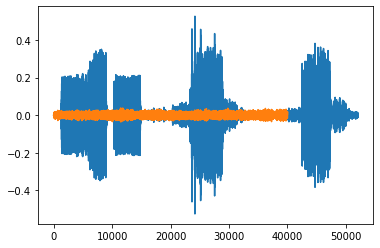

In [ ]:
plt.plot(nwave)

plt.plot(wave)

plt.show()

In [ ]:
pos='/content/Parsed_Capuchinbird_Clips'
neg='/content/Parsed_Not_Capuchinbird_Clips'

In [ ]:
pos=tf.data.Dataset.list_files(pos+"/*.wav")
neg=tf.data.Dataset.list_files(neg+'/*.wav')

In [ ]:
for i in pos.as_numpy_iterator():
  print(i)

b'/content/Parsed_Capuchinbird_Clips/XC216010-4.wav'
b'/content/Parsed_Capuchinbird_Clips/XC456314-0.wav'
b'/content/Parsed_Capuchinbird_Clips/XC27881-1.wav'
b'/content/Parsed_Capuchinbird_Clips/XC46241-3.wav'
b'/content/Parsed_Capuchinbird_Clips/XC114131-4.wav'
b'/content/Parsed_Capuchinbird_Clips/XC395129-6.wav'
b'/content/Parsed_Capuchinbird_Clips/XC433953-3.wav'
b'/content/Parsed_Capuchinbird_Clips/XC395129-3.wav'
b'/content/Parsed_Capuchinbird_Clips/XC178167-2.wav'
b'/content/Parsed_Capuchinbird_Clips/XC216010-6.wav'
b'/content/Parsed_Capuchinbird_Clips/XC9892-0.wav'
b'/content/Parsed_Capuchinbird_Clips/XC16803-2.wav'
b'/content/Parsed_Capuchinbird_Clips/XC495697-3.wav'
b'/content/Parsed_Capuchinbird_Clips/XC227469-1.wav'
b'/content/Parsed_Capuchinbird_Clips/XC3776-3.wav'
b'/content/Parsed_Capuchinbird_Clips/XC40355-0.wav'
b'/content/Parsed_Capuchinbird_Clips/XC201990-2.wav'
b'/content/Parsed_Capuchinbird_Clips/XC178168-5.wav'
b'/content/Parsed_Capuchinbird_Clips/XC401294-0.wav'
b

In [ ]:
posetive=tf.data.Dataset.zip((pos,tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negative=tf.data.Dataset.zip((neg,tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [ ]:
data=posetive.concatenate(negative)

In [ ]:
len(data)

810

In [ ]:
posetive.as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC98557-1.wav', 1.0)

In [ ]:
data.shuffle(1000).as_numpy_iterator().next()

(b'/content/Parsed_Capuchinbird_Clips/XC216012-7.wav', 1.0)

In [ ]:
lenghts=[]
for file in os.listdir('/content/Parsed_Capuchinbird_Clips'):
  tesor=load_audio_16k_mono('/content/Parsed_Capuchinbird_Clips/'+file)
  lenghts.append(len(tesor))

In [ ]:
print(tf.math.reduce_mean(lenghts))
print(tf.math.reduce_max(lenghts))
print(tf.math.reduce_min(lenghts))

tf.Tensor(54156, shape=(), dtype=int32)
tf.Tensor(80000, shape=(), dtype=int32)
tf.Tensor(32000, shape=(), dtype=int32)


In [ ]:
def preprocess_wave(file_path, label):
  wav = load_audio_16k_mono(file_path)
  wav = wav[:48000] # choise this by consedring mean,max,min be careful not too large!!
  zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32) # padding data with zero
  wav = tf.concat([zero_padding, wav],0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, label

In [ ]:
file_contant,label=posetive.as_numpy_iterator().next()

In [ ]:
spectrogram,label=preprocess_wave(file_contant,label)

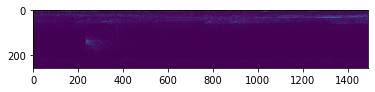

In [ ]:
plt.imshow(tf.transpose(spectrogram)[0])

In [ ]:
data=data.map(preprocess_wave)

data=data.cache()

data=data.shuffle(1000)

data=data.batch(16)

data=data.prefetch(8)



Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
len(data)*.7

35.699999999999996

In [ ]:
len(data)*.7
train=data.take(36)
test=data.skip(36).take(15)

In [ ]:
train.as_numpy_iterator().next()[0].shape

(16, 1491, 257, 1)

In [ ]:
i=tf.keras.layers.Input(shape=(1491, 257, 1))
x=tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',strides=2)(i)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Conv2D(16,kernel_size=(3,3),activation='relu',strides=2)(i)
x=tf.keras.layers.MaxPool2D()(x)
x=tf.keras.layers.Flatten()(x)
x=tf.keras.layers.Dense(128,activation='relu')(x)
x=tf.keras.layers.Dense(1,activation='sigmoid')(x)
model=tf.keras.Model(i,x)
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 1491, 257, 1)]    0         
                                                                 
 conv2d_15 (Conv2D)          (None, 745, 128, 16)      160       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 372, 64, 16)      0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 380928)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               48758912  
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                           

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss='binary_crossentropy',metrics=[tf.keras.metrics.Recall(),tf.keras.metrics.Precision()])

In [ ]:
history=model.fit(x=train,validation_data=test,epochs=4,verbose=2)


Epoch 1/4
36/36 - 13s - loss: 2.9337 - recall_1: 0.8846 - precision_1: 0.7753 - val_loss: 0.2968 - val_recall_1: 1.0000 - val_precision_1: 0.9275 - 13s/epoch - 352ms/step
Epoch 2/4
36/36 - 2s - loss: 0.1490 - recall_1: 0.9866 - precision_1: 0.9608 - val_loss: 0.1026 - val_recall_1: 0.9524 - val_precision_1: 0.9836 - 2s/epoch - 43ms/step
Epoch 3/4
36/36 - 2s - loss: 0.0893 - recall_1: 0.9739 - precision_1: 0.9803 - val_loss: 0.1013 - val_recall_1: 0.9714 - val_precision_1: 1.0000 - 2s/epoch - 43ms/step
Epoch 4/4
36/36 - 2s - loss: 0.0521 - recall_1: 0.9797 - precision_1: 0.9732 - val_loss: 0.0019 - val_recall_1: 1.0000 - val_precision_1: 1.0000 - 2s/epoch - 42ms/step


In [ ]:
x_test,y_test=test.as_numpy_iterator().next()

In [ ]:
yhat=model.predict(x_test)

1/1 [==============================] - 0s 317ms/step


In [ ]:
prediction=[1 if pr>0.5 else 0 for pr in yhat]

In [ ]:


""" Load a WAV file, convert it to a float tensor, resample to 1"""
def load_mp3_16k_mono(filename):
  res = tfio.audio.AudioIOTensor(filename)

  # Convert to tensor and combine channels

  tensor = res.to_tensor()

  tensor = tf.math.reduce_sum(tensor, axis=1) / 2

  sample_rate = res.rate 
  sample_rate = tf.cast(sample_rate, dtype=tf.int64)

  # Resample to 16 kHz

  wav = tfio.audio.resample(tensor, rate_in=sample_rate, rate_out=16000)
  return wav


In [ ]:
t1=load_mp3_16k_mono('/content/Forest Recordings/recording_00.mp3')

In [ ]:
def preprocess_mp3(sample, index):
  sample = sample[0]
  zero_padding = tf.zeros([48000] - tf.shape(sample), dtype=tf.float32) 
  # choise this by consedring mean,max,min be careful not too large!!
  # padding data with zero
  wav = tf.concat([zero_padding, sample],0)
  spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
  spectrogram = tf.abs(spectrogram)
  spectrogram = tf.expand_dims(spectrogram, axis=2)
  return spectrogram, index

In [ ]:
audio_slices=tf.keras.utils.timeseries_dataset_from_array(t1,t1,sequence_stride=48000,sequence_length=48000,batch_size=1)
# number of sequence_stride and sequence_length had been choisen by considering the train and test
audio_slices=audio_slices.map(preprocess_mp3)
audio_slices=audio_slices.batch(64)


In [ ]:
yhat=model.predict(audio_slices)

1/1 [==============================] - 1s 1s/step


In [ ]:
yhat=[1 if pr>0.99 else 0 for pr in yhat]

In [ ]:
print(yhat)

[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
from itertools import groupby
yhat=[key for key,group in groupby(yhat)]
yhat

[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

In [ ]:
sum(yhat)

5

In [ ]:
tf.math.reduce_sum(yhat)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [ ]:

rp={}
for files in os.listdir('/content/Forest Recordings'):
  t1=load_mp3_16k_mono('/content/Forest Recordings/'+files)
  audio_slices=tf.keras.utils.timeseries_dataset_from_array(t1,t1,sequence_stride=48000,sequence_length=48000,batch_size=1)
  audio_slices=audio_slices.map(preprocess_mp3)
  audio_slices=audio_slices.batch(64)
  yhat=model.predict(audio_slices)
  yhat=[1 if pr>0.99 else 0 for pr in yhat]
  yhat=[key for key,group in groupby(yhat)]
  rp[files]=sum(yhat)



1/1 [==============================] - 1s 1s/step


In [ ]:
rp

{'recording_38.mp3': 2,
 'recording_49.mp3': 0,
 'recording_41.mp3': 0,
 'recording_99.mp3': 5,
 'recording_66.mp3': 0,
 'recording_85.mp3': 0,
 'recording_22.mp3': 2,
 'recording_92.mp3': 10,
 'recording_30.mp3': 3,
 'recording_29.mp3': 0,
 'recording_32.mp3': 2,
 'recording_61.mp3': 1,
 'recording_06.mp3': 11,
 'recording_08.mp3': 17,
 'recording_93.mp3': 6,
 'recording_13.mp3': 0,
 'recording_63.mp3': 2,
 'recording_62.mp3': 0,
 'recording_33.mp3': 0,
 'recording_48.mp3': 10,
 'recording_86.mp3': 2,
 'recording_59.mp3': 1,
 'recording_97.mp3': 4,
 'recording_23.mp3': 8,
 'recording_58.mp3': 0,
 'recording_83.mp3': 0,
 'recording_05.mp3': 0,
 'recording_52.mp3': 0,
 'recording_79.mp3': 0,
 'recording_16.mp3': 8,
 'recording_88.mp3': 0,
 'recording_09.mp3': 0,
 'recording_98.mp3': 12,
 'recording_50.mp3': 0,
 'recording_28.mp3': 2,
 'recording_04.mp3': 10,
 'recording_21.mp3': 1,
 'recording_70.mp3': 4,
 'recording_89.mp3': 5,
 'recording_74.mp3': 0,
 'recording_35.mp3': 0,
 'recordin